In [6]:
array_ts = []
array_ts.append({1:123})
print(array_ts)
array_ts.append({2:456})
print(array_ts)

[{1: 123}]
[{1: 123}, {2: 456}]


In [22]:
d1 = float('-inf')
d2 = float('-inf')
if d1 == d2 :
    print("yes")

yes


In [34]:
for i in range(1,10):
    print(i)
for i in range(0,8,2):
    print(i)

1
2
3
4
5
6
7
8
9
0
2
4
6


In [3]:
x = [1]
y = [1,2,3]
y.extend(x)
y

[1, 2, 3, 1]

In [48]:
import numpy as np
xx = [1,3,2,5]

y = sorted(enumerate(xx), key = lambda x: x[1])
y

[(0, 1), (2, 2), (1, 3), (3, 5)]

In [56]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
test = [1, 1, 1, 1]
pred = [1, 2, 2, 2]

sk_report = classification_report(test, pred)
print(sk_report)
print(accuracy_score(test, pred))

             precision    recall  f1-score   support

          1       1.00      0.25      0.40         4
          2       0.00      0.00      0.00         0

avg / total       1.00      0.25      0.40         4

0.25


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [37]:
def load(directory, option):
    if option.lower() == 'raw data':
        dirname = "/RawData/"
        extension = ".csv"

    files_list = [f for f in os.listdir(directory + dirname) if f.lower().endswith(extension)]
    list_objects = []
    for file in files_list:
        path = directory + dirname + file
        an_object = np.genfromtxt(path, delimiter=",")
        list_objects.extend(an_object)
    # return a list[Array_TimeSeries]
    return list_objects

In [97]:
def dot_products_2(q, t):
    # concatenante n-m zeros for Query
    m, n = len(q), len(t)
    # reverse the Query
    q_r = q[::-1]
    q_ra = np.concatenate([q_r, np.zeros(n - m)])
    q_raf = np.fft.fft(q_ra)
    t_af = np.fft.fft(t)
    qt = np.fft.ifft(q_raf * t_af)
    return qt
q = [1, 2, 3, 4]
t = [1, 2, 3, 4]
print(np.dot(q,t))
dot_products_2(q, t)

30


array([24.+0.j, 22.+0.j, 24.+0.j, 30.+0.j])

In [122]:
meanQ = 2
sigmaQ = 2
sigmaNewQ = 2
L =2
meanT = np.array([(3,1), (3,1), (3,1), (3,1)])
for idx, val in enumerate(meanT):
    print(val)
print(meanT.__getitem__(1)[1])

[3 1]
[3 1]
[3 1]
[3 1]
1


In [154]:
from bisect import bisect_left
list = [('red', 4), ('blue', 2), ('yellow', 3), ('black', 4)]
list = sorted(list, key = lambda l:l[1])
print(list)
dist_exact = 2.5
values = [lb[1] for lb in lb_list]
index = bisect_left(values, dist_exact)
print(index)
rawIndexList = [lb[0] for lb in lb_list[:index]]
print(rawIndexList)
#index = lb_list[bisect_left(values, dist_exact)-1]
#print(index)

[('blue', 2), ('yellow', 3), ('red', 4), ('black', 4)]
2
['red', 'blue']


In [194]:
data = np.array([1, 2, 3])
data1 = np.append(data, [0]*2)
print(data1)

[1 2 3 0 0]


In [198]:
lb_list = [(1,2),(3,1),(5,6)]
lb_list = sorted(lb_list, key=lambda d: d[1])
print(lb_list)
print(1 + 0.5j > 0.5+0.5j)

[(3, 1), (1, 2), (5, 6)]


TypeError: '>' not supported between instances of 'complex' and 'complex'

In [219]:
data = [1,2,3]
(-2)**0.5

(8.659560562354934e-17+1.4142135623730951j)

In [6]:
import numpy as np

A = np.array([1.1,2,3,4])
B = np.array(['a','b','c',['&','&']])
allData = np.zeros(shape=[5, 3])
allData = allData.astype(str)
kk = 4
id = -1234

print("A", A)
A = A[:, np.newaxis]
B = B[:, np.newaxis]
indice = np.full((kk,1), id, dtype=int)

AB = np.concatenate((A,B,indice), axis=1)
print("AB", AB)
print("allData", allData[0:kk])
allData[0:kk] = AB

print("allData is ", allData)
A = allData[:,0].astype(float)
print("A is ", A)
indice = np.argpartition(A, -5, axis=0)[-5:]
#arr[np.argpartition(AB, -2, axis=0)[-2:][:,0]]
allData[allData[indice][:,0]  == '0.0'][0]




ValueError: setting an array element with a sequence

In [7]:
import pandas as pd
import numpy as np

class Shapelet(object):
    def __init__(self):
        self.id = 0.0
        self.Class = ''
        self.subseq = None
        self.DD = 0.0
        self.thresh = 0.0

def drawShapelet(path, filename):        
    testFile =  pd.read_csv(path+filename, header=None)
    Class = testFile[0][0]
    shapData = testFile[1][0]
    shapData = shapData.strip('()').replace('[','').replace(']','')
    shapeletList = []
    #shapObjectList: DD, Thresh
    shapObjectList = shapData.split("),(")
    for shapObject in shapObjectList:
        shap = Shapelet()
        shapObject = shapObject.split(',')
        shap.DD = float(shapObject[0])
        shap.thresh = float(shapObject[1])
        shap.subseq = [float(s) for s in shapObject[2:]]
        shapeletList.append(shap)
    return shapeletList

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


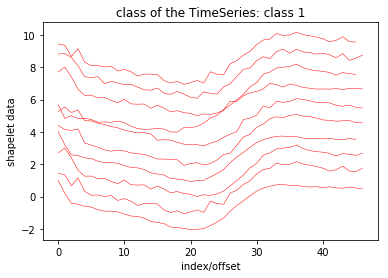

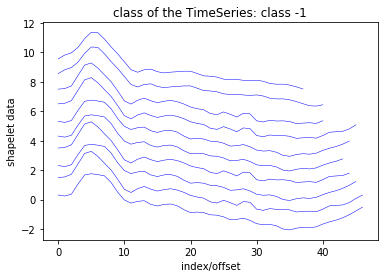

In [26]:
import matplotlib.pyplot as plt
path_wafer = "/Users/Jingwei/Desktop/PhD_study/Done/EDBTdemo2018/SMAP_results/wafer/Shapelets/"
f1_wafer = "part-00043-45d9b209-5200-4b47-abc0-ec91f7fa93e4-c000.csv" # 1
f2_wafer = "part-00013-45d9b209-5200-4b47-abc0-ec91f7fa93e4-c000.csv" #-1

path_ECG = "/Users/Jingwei/Desktop/PhD_study/Done/EDBTdemo2018/SMAP_results/ECG200/Shapelets/"
f1_ECG = "part-00043-956f02be-ab81-45db-9679-0bfd9150f5e8.csv" # 1
f2_ECG = "part-00013-956f02be-ab81-45db-9679-0bfd9150f5e8.csv" #-1
path = path_ECG
filename1 = f1_ECG
filename2 = f2_ECG
shapeletList1 = drawShapelet(path, filename1)
shapeletList2 = drawShapelet(path, filename2)

i = 0

for shap in shapeletList1[:10]:
    shapdata = shap.subseq
    shapdata = [ s + i for s in shapdata]
    plt.title("class of the TimeSeries: " + "class 1")
    plt.xlabel("index/offset")
    plt.ylabel("shapelet data")
    X = range(0, len(shapdata))
    plt.plot(X, shapdata, color='red', linewidth=0.5)   
    i = i + 1

#plt.savefig(path + "shapelet_class1.eps")
plt.show()
i = 0    
for shap in shapeletList2[:10]:
    shapdata = shap.subseq
    shapdata = [ s + i for s in shapdata]
    plt.title("class of the TimeSeries: " + "class -1")
    plt.xlabel("index/offset")
    plt.ylabel("shapelet data")
    X = range(0, len(shapdata))
    plt.plot(X, shapdata, color='blue', linewidth=0.5)
    i = i + 1
#plt.savefig(path + "shapelet_class2.eps")
plt.show()

In [27]:
class timeseries(object):
    def __init__(self):
        self.id = None
        self.Class = ''
        self.seq = None
    
def drawTS(path, filename):        
    tsObjectList1 = []
    tsObjectList2 = []
    testFile =  pd.read_csv(path+filename, header=None)   
    tsClass1 = testFile[testFile[1]==1]
    tsClass2 = testFile[testFile[1]==-1]
    for i in tsClass1.index:
        ts = timeseries()
        row = tsClass1.loc[i]
        ts.id = row[0]
        ts.Class = row[1]
        ts.seq = row[2].split(',')
        ts.seq = [float(val) for val in ts.seq]
        tsObjectList1.append(ts)

    for i in tsClass2.index:
        ts = timeseries()
        row = tsClass2.loc[i]
        ts.id = row[0]
        ts.Class = row[1]
        ts.seq = row[2].split(',')
        ts.seq = [float(val) for val in ts.seq]
        tsObjectList2.append(ts)

    return tsObjectList1, tsObjectList2

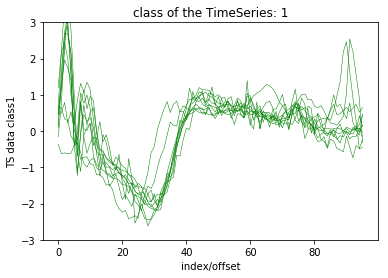

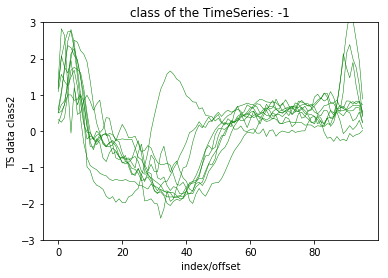

In [28]:
path_wafer = "/Users/Jingwei/Desktop/PhD_study/Done/EDBTdemo2018/SMAP_results/wafer/TS_raw/"
file_wafer = "part-00000-f6e4d506-8420-4ec4-aa77-7be111172a88-c000.csv"
path_ECG = "/Users/Jingwei/Desktop/PhD_study/Done/EDBTdemo2018/SMAP_results/ECG200/TS_raw/"
file_ECG = "TS.csv"
path = path_ECG
filename = file_ECG
tsObjectList1, tsObjectList2 = drawTS(path, filename)
for ts in tsObjectList1[11:21]:
    seq = ts.seq
    plt.title("class of the TimeSeries: " + "1")
    plt.xlabel("index/offset")
    plt.ylabel("TS data class1")
    plt.ylim(-3,3)
    X = range(0, len(seq))
    plt.plot(X, seq, color='green', linewidth=0.5)   
#plt.savefig(path + "wafer_class1.eps")
#plt.savefig("/Users/Jingwei/Desktop/EDBT demo/USE_results/ECG200/TSset_class1.eps")
plt.show()
for ts in tsObjectList2[0:10]:
    seq = ts.seq
    plt.title("class of the TimeSeries: " + "-1")
    plt.xlabel("index/offset")
    plt.ylabel("TS data class2")
    plt.ylim(-3,3)
    X = range(0, len(seq))
    plt.plot(X, seq, color='green', linewidth=0.5)   
#plt.savefig(path + "wafer_class2.eps")
plt.show()

In [5]:
import pandas as pd
import numpy as np
path = "/Users/Jingwei/PycharmProjects/distributed_use/venv/TestDataset/UCR_TS_Archive_2015/StarLightCurves/"
filename= "StarLightCurves_TRAIN"
testFile = pd.read_csv(path+filename, header=None)
testFile.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 1025 entries, 0 to 1024
dtypes: float64(1024), int64(1)
memory usage: 7.8 MB


In [10]:
print(testFile.head(2))

   0       1       2       3       4       5       6       7       8     \
0     3  0.5373  0.5311  0.5285  0.5294  0.5336  0.5409  0.5511  0.5640   
1     3  0.5884  0.5939  0.5991  0.6041  0.6088  0.6134  0.6178  0.6221   

     9      ...      1015    1016    1017    1018    1019    1020    1021  \
0  0.5796   ...    0.5471  0.5469  0.5459  0.5439  0.5410  0.5372  0.5323   
1  0.6261   ...    0.2288  0.2374  0.2465  0.2562  0.2665  0.2774  0.2888   

     1022    1023    1024  
0  0.5264  0.5195  0.5114  
1  0.3009  0.3136  0.3269  

[2 rows x 1025 columns]


In [24]:
print(testFile[testFile[0]==1].index)
print(testFile[testFile[0]==2].index)
print(testFile[testFile[0]==3].index)

df1 = testFile[testFile[0]==1].head(30)
df2 = testFile[testFile[0]==2].head(30)
df3 = testFile[testFile[0]==3].head(30)
df1 = df1.append(df2).append(df3)
df1.info()
df1.to_csv('/Users/Jingwei/Desktop/EDBT demo/StarLightStar_Sample', sep=',', header=False, index=False)

Int64Index([  2,  16,  21,  23,  26,  35,  36,  39,  48,  49,
            ...
            913, 923, 933, 937, 940, 957, 979, 988, 990, 997],
           dtype='int64', length=152)
Int64Index([  5,   7,  10,  17,  19,  22,  30,  32,  33,  37,
            ...
            969, 973, 977, 980, 981, 985, 989, 992, 993, 995],
           dtype='int64', length=275)
Int64Index([  0,   1,   3,   4,   6,   8,   9,  11,  12,  13,
            ...
            982, 983, 984, 986, 987, 991, 994, 996, 998, 999],
           dtype='int64', length=573)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 2 to 55
Columns: 1025 entries, 0 to 1024
dtypes: float64(1024), int64(1)
memory usage: 721.4 KB


In [2]:
import matplotlib.pyplot as plt

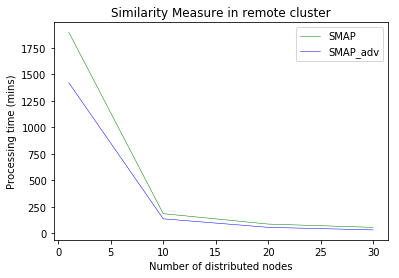

In [46]:
SMAP_DM = [1721, 168, 79, 51]

SMAPadv_DM = [1289, 124, 51, 29]
SMAP_DM = [i * 3.2/2.9 for i in SMAP_DM]
SMAPadv_DM = [i * 3.2/2.9 for i in SMAPadv_DM]

plt.title("Similarity Measure in remote cluster")
plt.xlabel("Number of distributed nodes")
plt.ylabel("Processing time (mins)")
X = [1, 10, 20, 30]
plt.plot(X, SMAP_DM, color='green', linewidth=0.5, label = "SMAP") 
plt.plot(X, SMAPadv_DM, color='blue', linewidth=0.5, label = "SMAP_adv") 
plt.legend()
plt.savefig("/Users/Jingwei/Desktop/EDBT demo/USE_results/PhalangesOutlines/PhalangesDistM.eps")
plt.show()

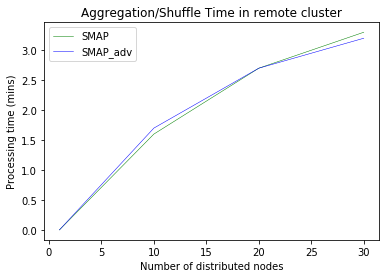

In [47]:
plt.title("Aggregation/Shuffle Time in remote cluster")
plt.xlabel("Number of distributed nodes")
plt.ylabel("Processing time (mins)")
SMAP_Agg = [0, 1.6, 2.7, 3.3]
SMAPadv_Agg = [0, 1.7, 2.7, 3.2]
X = [1, 10, 20, 30]
plt.plot(X, SMAP_Agg, color='green', linewidth=0.5, label = "SMAP") 
plt.plot(X, SMAPadv_Agg, color='blue', linewidth=0.5, label = "SMAP_adv") 
plt.legend()
plt.savefig("/Users/Jingwei/Desktop/EDBT demo/USE_results/PhalangesOutlines/PhalangesShuffle.eps")
plt.show()

In [108]:
n =3
total_width = 1
width = total_width / 3
path = "/Users/Jingwei/Desktop/EDBT demo/USE_results/"
name_list = ['Centralized','1 node','10 nodes','20 nodes', '30 nodes']

ECG_USE = [2547, 0, 0, 0, 0]
ECG_DistM = [1558, 440, 138, 135, 136]
ECG_Shuffle = [0, 0.9, 3.1, 4.8, 6.2]
ECG_total = [1558, 440.9, 141.1, 139.8, 142.2]

ECGadv_DistM = [1198, 308, 101, 103, 102]
ECGadv_Shuffle = [0, 1.1, 3.2, 4.5, 6.1]
ECGadv_total = [1198, 309.1, 104.2, 107.4, 108.1]

def plot_algo_time(name_list, ECG_USE, ECG_total, ECG_Shuffle, ECGadv_total, time_scale, dataset_name):
    x =list(range(len(name_list)))
    
    fig = plt.figure()
    ax1= fig.add_subplot(111)
    ax1.set_ylabel("Total time ("+ time_scale + ")")
    #USE
    ax1.bar(x, ECG_USE, width = width, label='USE',fc = 'y')
    ax1.text(x[0], ECG_USE[0]+0.05, '%.0f' % ECG_USE[0], ha='center', va= 'bottom',fontsize=10)
    #SMAP
    for i in range(len(x)):
        x[i] = x[i] + width
    ax1.bar(x, ECG_total, width = width, label='SMAP',fc = 'b', tick_label = name_list)
    for a,b in zip(x, ECG_total):
        ax1.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
    
    #SMAP_adv
    for i in range(len(x)):
        x[i] = x[i] + width   
    ax1.bar(x, ECGadv_total, width = width, label='SMAP_LB',fc = 'r')
    ax1.legend(loc = 9)
    for a,b in zip(x, ECGadv_total):
        ax1.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
    ax2 = plt.twinx()
    ax2.set_ylim([0, 20])
    ax2.set_ylabel("Agg. time ("+ time_scale + ")")
    ax2.plot(x, ECG_Shuffle, 'g', marker = "o", label = 'Aggregation.')
    ax2.legend(loc = 1)
    plt.savefig(path + dataset_name + "_cluster.eps")
    
    

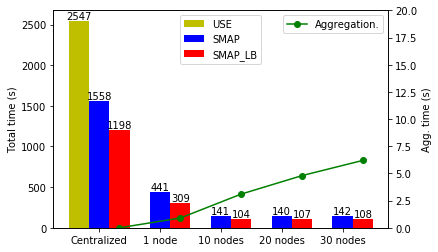

In [109]:
plot_algo_time(name_list, ECG_USE, ECG_total, ECG_Shuffle, ECGadv_total, 's', 'ECG200')

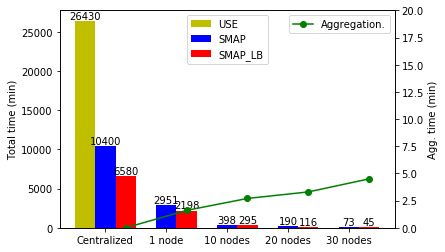

In [111]:
#USE-Wafer: 26430 mins
#SMAP-Wafer: 1651 mins
Wafer_USE = [26430, 0, 0 ,0 ,0]
Wafer_DistM = [2951, 840, 182, 97, 51]
Wafer_Shuffle = [0, 1.6, 2.7, 3.3, 4.5]
Wafer_total = [10400, 2951, 398, 190, 73]

Waferadv_DistM = [2198, 608, 141, 74, 30.5]
Waferadv_total = [6580, 2198, 295, 116, 45]
plot_algo_time(name_list, Wafer_USE, Wafer_total, Wafer_Shuffle, Waferadv_total, 'min', 'Wafer')